In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import leastsq
import matplotlib.dates as mdates
import datetime

week = 7

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [3]:
months = mdates.MonthLocator() 
months_fmt = mdates.DateFormatter('%b')

In [4]:
data   = pd.read_csv('us-counties.csv', sep=',',header=0).values

In [25]:
county = "Boulder"
state  = "Colorado"
ct_dat = data[np.array([(entry[1] == county and entry[2] == state) for entry in data])]
ct_dat = ct_dat.transpose()

In [26]:
dates  = ct_dat[0][1:]
cases  = np.diff(ct_dat[4])
deaths = np.diff(ct_dat[5])

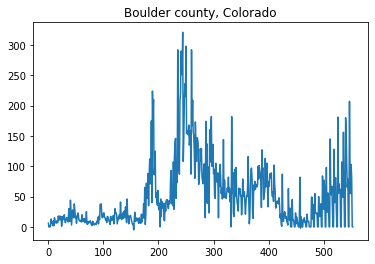

In [27]:
fig, ax = plt.subplots()
ax.plot(cases)
# ax.plot(dates, cases)

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(months_fmt)

# datemin = np.datetime64(dates[0], 'M')
# datemax = np.datetime64(dates[-1], 'M') + np.timedelta64(1, 'M')
# ax.set_xlim([datemin, datemax])

plt.title(county + " county, " + state)

plt.show()

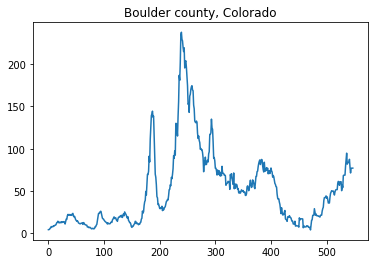

In [28]:
week_avg  = running_mean(cases,7)
plt.plot(week_avg)
plt.title(county + " county, " + state)
plt.show()

In [9]:
cases[-10:]

array([79, 0, 0, 207, 93, 55, 103, 81, 0, 0], dtype=object)

In [10]:
dates[180]

'2020-09-11'